# APRILTAG

In [1]:
#!pip install apriltag

In [2]:
import apriltag
import cv2
import copy
import glob
import numpy as np
import os

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
img = cv2.imread('/workspace/multiview_calibration/ros-apriltag-board.png', cv2.IMREAD_GRAYSCALE)
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
#april_sample.png
detector = apriltag.Detector()
base_result = detector.detect(img)

In [17]:
img.shape

(2100, 2800)

In [18]:
blue = [255,0,0]
red = [0,0,255]
greed = [0,255,0]
purple = [255,0,255]

colors = [blue, red, greed, purple]
num_detection = len(base_result)

img_plot = cv2.imread('/workspace/multiview_calibration/ros-apriltag-board.png')
img_plot = cv2.rotate(img_plot, cv2.ROTATE_90_COUNTERCLOCKWISE)

for i_tag in range(num_detection):
    
    one_tag = base_result[i_tag]
    one_tagname = base_result[i_tag].tag_family
    one_corners = base_result[i_tag].corners
    
    for i_corner in range(4):
        img_plot = cv2.circle(img_plot, (int(one_corners[i_corner,0]),int(one_corners[i_corner,1])), 0, colors[i_corner], 30)
    
    

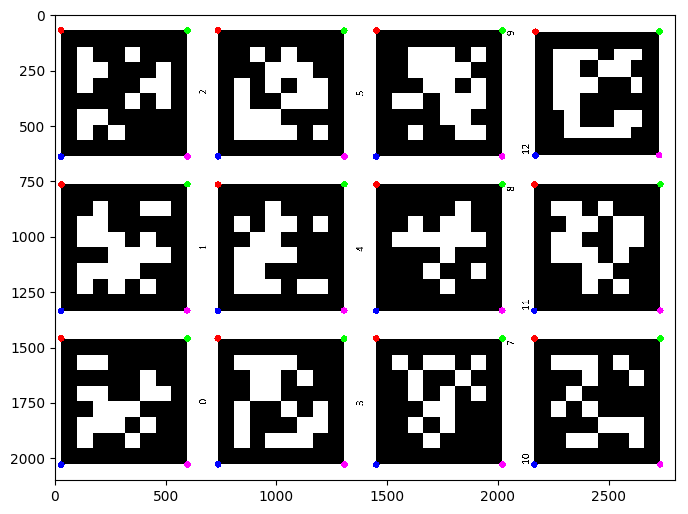

In [19]:
fig=plt.figure(figsize=(8,12), dpi= 100, facecolor='w', edgecolor='k')
plt.imshow(img_plot[:,:,::-1])

In [22]:
#result sorted with tag_id automatically.

# FFMPEG RAW VIDEO

In [23]:
# !ffmpeg -i /workspace/multiview_calibration/NeRF_input/test_01/raw_data/HICT.mp4 -vf fps=2 /workspace/multiview_calibration/NeRF_input/test_01/raw_data/%04d.png

# DEBUG APRILTAG DETECTION

In [15]:
render_debug = True

detector = apriltag.Detector()

data_root = '/workspace/multiview_calibration/MULTIVIEW/cal_image/0-1/'

debug_dir = os.path.join(data_root, 'debug_cal')

if not os.path.exists(debug_dir):
    os.makedirs(debug_dir)

images = glob.glob(os.path.join(data_root, 'cam00', '*.png'))
images.sort()

blue = [255,0,0]
red = [0,0,255]
greed = [0,255,0]
purple = [255,0,255]
colors = [blue, red, greed, purple]

frame = 0
#fname = images[0]
for fname in images:
    
    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    img_plot = cv2.imread(fname)
    result = detector.detect(img)
    num_detection = len(result)

    for i_tag in range(num_detection):
    
        one_tag = result[i_tag]
        one_tagname = result[i_tag].tag_family
        one_corners = result[i_tag].corners

        if render_debug:
            for i_corner in range(4):
                img_plot = cv2.circle(img_plot, (int(one_corners[i_corner,0]),int(one_corners[i_corner,1])), 0, colors[i_corner], 10)
    
    if render_debug:
        cv2.imwrite(os.path.join(debug_dir, '%04d.png'%frame), img_plot)
        frame += 1
    

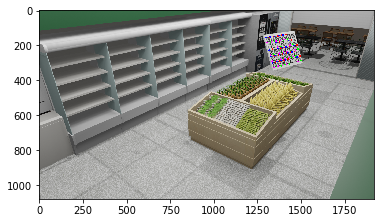

In [13]:
plt.imshow(img_plot[:,:,::-1])

In [24]:
render_debug = True

detector = apriltag.Detector()

data_root = '/workspace/multiview_calibration/NeRF_input/test_01'

debug_dir = os.path.join(data_root, 'debug_cal')

if not os.path.exists(debug_dir):
    os.makedirs(debug_dir)

images = glob.glob(os.path.join(data_root, 'raw_data', '*.png'))
images.sort()

blue = [255,0,0]
red = [0,0,255]
greed = [0,255,0]
purple = [255,0,255]
colors = [blue, red, greed, purple]

frame = 0
#fname = images[0]
for fname in images:
    
    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    img_plot = cv2.imread(fname)
    result = detector.detect(img)
    num_detection = len(result)

    for i_tag in range(num_detection):
    
        one_tag = result[i_tag]
        one_tagname = result[i_tag].tag_family
        one_corners = result[i_tag].corners

        if render_debug:
            for i_corner in range(4):
                img_plot = cv2.circle(img_plot, (int(one_corners[i_corner,0]),int(one_corners[i_corner,1])), 0, colors[i_corner], 10)
    
    if render_debug:
        cv2.imwrite(os.path.join(debug_dir, '%04d.png'%frame), img_plot)
        frame += 1


# SYNTHESIS

In [25]:

detector = apriltag.Detector()

# Arrays to store object points and image points from all the images.
april_objpoints = [] # 3d point in real world space
april_imgpoints = [] # 2d points in image plane.

images = glob.glob(os.path.join(data_root, 'raw_data', '*.png'))
images.sort()

blue = [255,0,0]
red = [0,0,255]
greed = [0,255,0]
purple = [255,0,255]
colors = [blue, red, greed, purple]

for fname in images:
    
    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)
    img_plot = cv2.imread(fname)
    result = detector.detect(img)
    num_detection = len(result)
    
    detected_tag = []
    april_imgpt = []
    for i_tag in range(num_detection):
        one_tag = result[i_tag]
        detected_tag.append(one_tag.tag_id)
        one_corners = one_tag.corners
        april_imgpt.append(one_corners)
        
    april_imgpt = np.array(april_imgpt)
    april_imgpt = april_imgpt.reshape(-1, 1, 2)
    april_imgpoints.append(april_imgpt.astype(np.float32))
    # MAKE OBJP
    apriltag_objp = []
    for i_tag in detected_tag:
        base_one_tag = base_result[i_tag]
        base_one_corners = base_one_tag.corners
        apriltag_objp.append(base_one_corners)

    apriltag_objp = np.array(apriltag_objp)
    apriltag_objp = apriltag_objp.reshape(-1,2)
    _zeros = np.zeros([apriltag_objp.shape[0],1])
    apriltag_objp = np.concatenate([apriltag_objp, _zeros], axis=1)
    apriltag_objp *= 50/(597.00000089 - 27.99999955)
    april_objpoints.append(apriltag_objp.astype(np.float32))


In [26]:
# camera intrinsic calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(april_objpoints, april_imgpoints, img.shape[::-1],None,None)

In [27]:
ret

0.5879232978677039

In [28]:
mtx

array([[1.02942475e+03, 0.00000000e+00, 3.72192303e+02],
       [0.00000000e+00, 1.02587025e+03, 6.27676864e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [29]:
dist

array([[ 2.91867768e-01, -1.51902658e+00, -4.59843069e-04,
         4.84106113e-04,  2.32886181e+00]])

In [30]:
# reprojection error
mean_error = 0
for i in range(len(april_objpoints)):
    imgpoints2, _ = cv2.projectPoints(april_objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(april_imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
#     print(error)
    if error > 0.5:
        print('alert!')
        print(error)
    mean_error += error
print( "total error: {}".format(mean_error/len(april_objpoints)))

total error: 0.08858372939395842


# EXPORT TRANSFORMS_JSON

In [31]:
import json

In [32]:
def listify_matrix(matrix):
    matrix_list = []
    for row in matrix:
        matrix_list.append(list(row))
    return matrix_list

In [33]:
_R_cv2bcam = np.array([[1,0,0],
                       [0,-1,0],
                       [0,0,-1]])

out_data = {
    'aabb_scale': 4,
    'camera_angle_x': 0.0,
    'camera_angle_y': 0.0,
    'cx': mtx[0,2],
    'cy': mtx[1,2],
    'fl_x': mtx[0,0],
    'fl_y': mtx[1,1],
    'h': img.shape[0],
    'w': img.shape[1],
    'k1': dist[0,0],
    'k2': dist[0,1],
    'p1': dist[0,2],
    'p2': dist[0,3],
}

out_data['frames'] = []

for i in range(len(april_objpoints)): # 70
    camera_dict = {
        'K' : None,
        'R' : None,
        'T' : None
    }
#     camera_dict['K'] = k
#     camera_dict['R'] = R
#     camera_dict['T'] = t
    
    R, _ = cv2.Rodrigues(rvecs[i])
#     t = tvecs[i]/100. #(mm to M)? scale problem exist.
    t = tvecs[i]/250. #(mm to M)? scale problem exist.
    k = mtx
    
    Tr = np.identity(4)
    
    R_bcam = np.matmul(_R_cv2bcam, R)
    T_bcam = np.matmul(_R_cv2bcam, t)                       
    R_world = R_bcam.transpose()
    T_world = -np.matmul(R_world, T_bcam)
    
    R_world = R_world.reshape(3,3)
    T_world = T_world.reshape(3,1)
    
    Tr[:3,:3] = R_world
    Tr[:3,3:] = T_world
    
    frame_data = {
        'file_path': 'images/%04d.png'%i,
        'sharpness': 20.0,
        'transform_matrix': listify_matrix(Tr)
    }
    
    out_data['frames'].append(frame_data)
    
with open(os.path.join(data_root, 'transforms.json'), 'w') as out_file:
    json.dump(out_data, out_file, indent=4, sort_keys=True)
    
#     np.save('/workspace/multiview_calibration/apriltag_camera_params/%04d.npy'%i, camera_dict)

# GO TO NERF

In [ ]:
# transforms.json
# raw_data -> images
# IN NERF DIR,
# ./build/testbed --scene data/nerf/{YOUR_EXP_NAME}/transforms.json